# 라이브러리

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 경로 설정

In [2]:
data_path = '../data'
data_name = '/feature_choice.csv'

# 데이터 읽어 오기

In [3]:
data_set = pd.read_csv(data_path + data_name, delimiter = ',')
data_set.dropna(inplace = True)
data_set = data_set.drop(columns = ['index'])

# x_data = data_set.drop(columns = ['quality'])
x_data = data_set[['alcohol', 'volatile acidity']]
y_data = data_set['quality']

x_data = x_data.values.tolist()
y_data = y_data.values.tolist()

# train_set 설정

In [4]:
train_size = int(len(x_data) * 0.7)

x_train = x_data[:train_size]
x_train = np.array(x_train, dtype = np.float32)

y_train = y_data[:train_size]
y_train = [i-3 for i in y_train]
y_train = np.array(y_train, dtype = np.int32)
y_train = y_train.reshape([-1,1])

# test_set 설정

In [5]:
x_test = x_data[train_size:]
x_test = np.array(x_test, dtype = np.float32)

y_test = y_data[train_size:]
y_test = [i-3 for i in y_test]
y_test = np.array(y_test, dtype = np.int32)
y_test = y_test.reshape([-1,1])

# 하이퍼파라미터 설정

In [6]:
class_dict = {}

for i in y_train:
    class_dict[i[0]] = 1

In [19]:
x_de = len(x_train[0])
classes = len(class_dict)
learning_rate = 0.001

# 로지스틱 설정

# 1 layer

In [8]:
x = tf.placeholder(tf.float32, shape = [None, x_de])
y = tf.placeholder(tf.int32, shape = [None, 1])

y_one_hot = tf.one_hot(y, classes)
y_one_hot = tf.reshape(y_one_hot, [-1,classes])

W = tf.get_variable("W", shape = [x_de,classes], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([classes]))

logits = tf.matmul(x,W) + b
h = tf.nn.softmax(logits)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# output layer

In [20]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_one_hot)
cost = tf.reduce_mean(cost_i)
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

predict = tf.argmax(h,1)
acc = tf.reduce_mean(tf.cast(tf.equal(predict, tf.argmax(y_one_hot, 1)), dtype = tf.float32))

# 돌리기

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    cost_x = []
    cost_y = []
    
    for step in range(2001):
        temp = 0
        c, _ = sess.run([cost, train], feed_dict = {x : x_train, y : y_train})
        
        cost_x.append(step)
        cost_y.append(c)
        
        if(step % 100 == 0):
            print("Step : {}, cost : {}".format(step,c))
        
    for step in range(2001):
        ac = sess.run([acc], feed_dict = {x : x_test, y : y_test})
        
    print("Accuracy : {}%".format(ac[0] * 100))

Step : 0, cost : 6.47685289383
Step : 100, cost : 4.45207071304
Step : 200, cost : 3.20018339157
Step : 300, cost : 2.59291553497
Step : 400, cost : 2.22319483757
Step : 500, cost : 1.89977693558
Step : 600, cost : 1.62123346329
Step : 700, cost : 1.44940340519
Step : 800, cost : 1.38731944561
Step : 900, cost : 1.36513316631
Step : 1000, cost : 1.35306084156
Step : 1100, cost : 1.34476912022
Step : 1200, cost : 1.338357687
Step : 1300, cost : 1.33303248882
Step : 1400, cost : 1.32838845253
Step : 1500, cost : 1.3241918087
Step : 1600, cost : 1.32029688358
Step : 1700, cost : 1.31660783291
Step : 1800, cost : 1.31306266785
Step : 1900, cost : 1.30961740017
Step : 2000, cost : 1.3062415123
Accuracy : 42.6069051027%


# 그래프 그리기

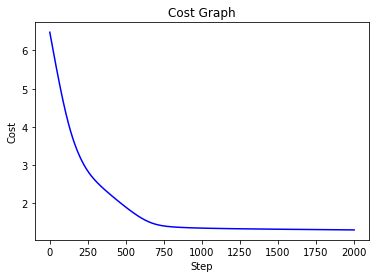

In [22]:
plt.plot(cost_x, cost_y, 'b-')
plt.title("Cost Graph")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show()